In [50]:
import numpy as np
import statistics
import matplotlib.pyplot as plt
from scipy.stats import norm
import seaborn as sns

option = input('What option do you want to evaluate ("Call", "Put", "Forward Contract")')
S0, K, T, r, q, sigma, tol= 180, 160, 88/365, 0.01, 0.015, 0.2, 0.1

k=10000
#Calculate Payoff and sd of sample and estimate N
z_sample= np.random.normal(0,1,size = k)
St_sample= S0*np.exp((r-q-(sigma**2)/2)*T+sigma*np.sqrt(T)*z_sample)
W_sample = np.zeros(k)

if option =="Call":
    W_sample = np.exp(-r*T)*np.maximum(St_sample -K, 0)
elif option =="Put": 
    W_sample = np.exp(-r*T)*np.maximum(-St_sample +K, 0)
else: 
    W_sample = St_sample

sd_sample= np.std(W_sample)
N=int((1.96*sd_sample/(tol/2))**2)
    
#Calculate theoretical option values
d1= (np.log(S0/K) + (r-q+sigma**2/2)*T)/(sigma*np.sqrt(T))
d2= d1-sigma*np.sqrt(T)

theo_value = 0
theo_delta = 0

if option =="Call":
    theo_value = S0*np.exp(-q*T)*norm.cdf(d1)-np.exp(-r*T)*K*norm.cdf(d2)
    theo_delta = np.exp(-q*T)*norm.cdf(d1)
elif option =="Put": 
    theo_value = -S0*np.exp(-q*T)*norm.cdf(-d1)+np.exp(-r*T)*K*norm.cdf(-d2)
    theo_delta = np.exp(-q*T)*(norm.cdf(d1)-1)
else: 
    theo_value = S0*np.exp((r-q)*T)
    theo_delta = np.exp(-q*T)

print("Theoretical option value is", theo_value)
print("Theoretical delta value is", theo_delta)

#Part a: Calculate new option value as average of W1 to WN
def price_of_trade_a(S0, r,q,K,sigma, tol,N,option):
    z= np.random.normal(0,1, size =N)
    St= S0*np.exp((r-q-(sigma**2)/2)*T+sigma*np.sqrt(T)*z)
    W = np.zeros(N)
    
    if option =="Call":
        W = np.exp(-r*T)*np.maximum(St -K, 0)
    elif option =="Put": 
        W = np.exp(-r*T)*np.maximum(-St+K, 0)
    else: 
        W = St
    
    V_sim = np.mean(W)
    sd = np.std(W)
   
    conf_int = np.zeros(2)
    conf_int[0] = V_sim-1.96*sd/np.sqrt(N)
    conf_int[1] = V_sim+1.96*sd/np.sqrt(N)
    
    print("Values of N, V_sim and its confidence interval are", N, V_sim, conf_int)
#     print(V_sim)
#     print(conf_int)
#     print(conf_int[1]-conf_int[0])
    return N, V_sim, conf_int 

price_of_trade_a(S0, r,q,K,sigma, tol,N, option)



What option do you want to evaluate ("Call", "Put", "Forward Contract")Call
Theoretical option value is 20.691818313854952
Theoretical delta value is 0.8885902097987676
Values of N, V_sim and its confidence interval are 390542 20.749601324150788 [20.69893545 20.8002672 ]


(390542, 20.749601324150788, array([20.69893545, 20.8002672 ]))

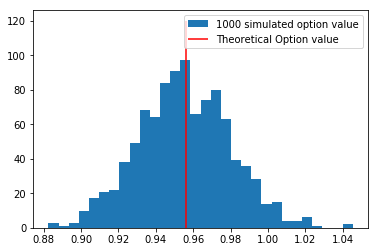

In [41]:
#Part b
#Same as part a function but without the print out of values
def price_of_trade(S0, r,q,K,sigma, tol,N,option):
    z= np.random.normal(0,1, size =N)
    St= S0*np.exp((r-q-(sigma**2)/2)*T+sigma*np.sqrt(T)*z)
    W = np.zeros(N)
    
    if option =="Call":
        W = np.exp(-r*T)*np.maximum(St -K, 0)
    elif option =="Put": 
        W = np.exp(-r*T)*np.maximum(-St+K, 0)
    else: 
        W = St
    
    V_sim = np.mean(W)
    sd = np.std(W)
   
    conf_int = np.zeros(2)
    conf_int[0] = V_sim-1.96*sd/np.sqrt(N)
    conf_int[1] = V_sim+1.96*sd/np.sqrt(N)
    
    return V_sim

M=1000
def part_b(M):
    values = np.zeros(M)
    for i in range (0, M):
        values[i]=price_of_trade(S0, r,q,K,sigma, tol,N,option)
        
    plt.hist(values, bins = 30, label = str(M)+" simulated option value")
    plt.vlines(theo_value, ymin = 0, ymax = 120, colors='red', linestyles='solid', label='Theoretical Option value')
    plt.legend()

part_b(M)



Do you want to use antithetical draw ("Yes", "No")Yes
17480


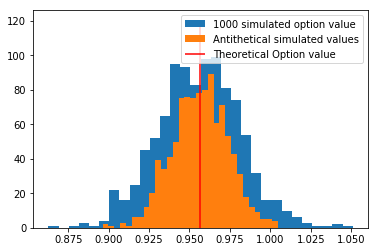

In [42]:
#Partc
import matplotlib.pyplot as plt
draw = input('Do you want to use antithetical draw ("Yes", "No")')
if N %2 ==0:
    n = N
else: 
    n = int((N+1)/2)

print(n)

def antithetical_draw(S0, r,q,K,sigma, tol,n,option,draw):
    V_simc = np.zeros(n)
    W_pos= np.zeros(n)
    W_neg= np.zeros(n)
    
    if draw == "Yes": 
        pos_z= np.random.normal(0,1, size =n)
        neg_z = pos_z*(-1)
        pos_St= S0*np.exp((r-q-(sigma**2)/2)*T+sigma*np.sqrt(T)*pos_z)
        neg_St= S0*np.exp((r-q-(sigma**2)/2)*T+sigma*np.sqrt(T)*neg_z)

        if option =="Call":
            W_pos= np.exp(-r*T)*np.maximum(pos_St -K, 0)
            W_neg= np.exp(-r*T)*np.maximum(neg_St -K, 0)
        elif option =="Put": 
            W_pos = np.exp(-r*T)*np.maximum(-pos_St+K, 0)
            W_neg = np.exp(-r*T)*np.maximum(-neg_St+K, 0)
        else: 
            W_pos= pos_St
            W_neg = neg_St

        V_simc = (np.mean(W_pos) + np.mean(W_neg))/2

    else: 
        V_simc = price_of_trade(S0, r,q,K,sigma, tol,N,option)
    
    return V_simc

antithetical_draw(S0, r,q,K,sigma, tol,n,option,draw)

Mc=1000
def part_c(Mc):
    
    values_c = np.zeros(Mc)

    for v in range (0, Mc):
        values_c[v]=antithetical_draw(S0, r,q,K,sigma, tol,n,option,draw)

#print (values_c)
#   vlines(x, ymin, ymax, colors='k', linestyles='solid', label=''
    plt.hist(values_c, bins = 30, label = "Antithetical simulated values" )
    plt.legend()
    #sns.distplot(values_c)


part_b(M)
part_c(Mc)

array([0.90706559, 0.91618544, 0.92204813, 0.91873056, 0.92380265,
       0.94065144, 0.9386828 , 0.94165106, 0.95058999, 0.94900244,
       0.95390613, 0.9569562 , 0.95815895, 0.96046803, 0.96108432,
       0.96183753, 0.96355064, 0.96603943, 0.9702182 , 0.96938504,
       0.97022988, 0.97157784, 0.97353955, 0.9739631 ])

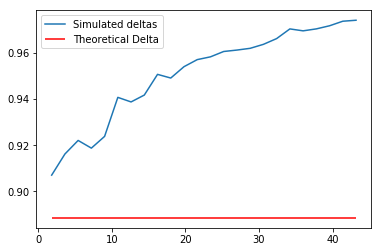

In [70]:
#Part d: 

def part_di():
    epsilon = np.zeros(24)
    delta = np.zeros(24)
    V_simd1= np.zeros(24)
    V_simd2= np.zeros(24)
    for u in range(1,25): 
        epsilon[u-1] = u*0.01*S0
        V_simd1[u-1] = price_of_trade(S0+epsilon[u-1], r,q,K,sigma, tol,N,option)
        V_simd2[u-1] = price_of_trade(S0, r,q,K,sigma, tol,N,option)
        delta[u-1] = (V_simd1[u-1] - V_simd2[u-1])/epsilon[u-1]
#       diff = np.abs(delta-theo_delta)
#     plt.plot(epsilon, diff, label = "Absolute error in deltas")
#     plt.xlabel('Epsilon')
#     plt.ylabel('Absolute Error')
    plt.plot(epsilon, delta, label = "Simulated deltas")
    plt.hlines(theo_delta, xmin= epsilon[0], xmax = epsilon[23], colors='red', linestyles='solid', label='Theoretical Delta')
    plt.legend()
    return delta
    
part_di()




[0.00964424 0.01688465 0.02395425 0.03134728 0.03834526 0.04339576
 0.04757168 0.0521862  0.05646248 0.05996669 0.06317464 0.06643061
 0.06850328 0.07082968 0.07259887 0.07554082 0.07762536 0.07856862
 0.08029299 0.08186531 0.08236574 0.08381717 0.0844099  0.08547977]


TypeError: 'str' object is not callable

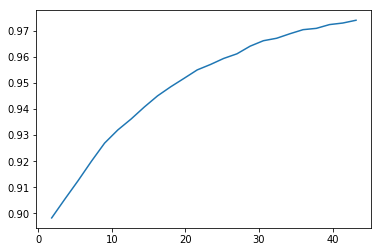

In [71]:
def part_dii(S0, r,q,K,sigma, tol,N,option):
    epsilon = np.zeros(24)
    delta_dii = np.zeros(24)
    V_sim_dii = np.zeros(24)
    V_sim_shifted = np.zeros(24)
    for u in range(1,25): 
        epsilon[u-1] = u*0.01*S0
        z_dii= np.random.normal(0,1, size =N)
        St_dii = S0*np.exp((r-q-(sigma**2)/2)*T+sigma*np.sqrt(T)*z_dii)
        St_shifted = (S0+epsilon[u-1])*np.exp((r-q-(sigma**2)/2)*T+sigma*np.sqrt(T)*z_dii)
        W_dii = np.zeros(N)
        W_shifted = np.zeros(N)

        if option =="Call":
            W_dii = np.exp(-r*T)*np.maximum(St_dii -K, 0)
            W_shifted = np.exp(-r*T)*np.maximum(St_shifted -K, 0)
        elif option =="Put": 
            W_dii = np.exp(-r*T)*np.maximum(-St_dii+K, 0)
            W_shifted = np.exp(-r*T)*np.maximum(-St_shifted+K, 0)
        else: 
            W_dii = St_dii
            W_shifted = St_shifted

        V_sim_dii[u-1] = np.mean(W_dii)
        V_sim_shifted[u-1] = np.mean(W_shifted)
        #print((V_sim_shifted - V_sim_dii)/epsilon)
        delta_dii[u-1] = (V_sim_shifted[u-1] - V_sim_dii[u-1])/epsilon[u-1]
    print(delta_dii-theo_delta)
    plt.plot(epsilon, delta_dii, label = "Simulated delta")
    plt.hlines(theo_delta, xmin= epsilon[0], xmax = epsilon[23], colors='red', linestyles='solid', label='Theoretical Delta')
    plt.legend()
    return V_sim_dii, V_sim_shifted

part_dii(S0, r,q,K,sigma, tol,N,option)
